In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
img = cv2.imread("C:../images_dataset/lionel_messi/02453493f852c0efe8ff951dea5845c4.jpg")
img

array([[[54, 57, 42],
        [53, 56, 41],
        [53, 56, 41],
        ...,
        [83, 58, 56],
        [83, 58, 56],
        [81, 58, 56]],

       [[55, 58, 43],
        [54, 57, 42],
        [54, 57, 42],
        ...,
        [78, 53, 51],
        [78, 53, 51],
        [76, 53, 51]],

       [[57, 57, 43],
        [57, 57, 43],
        [56, 56, 42],
        ...,
        [72, 47, 45],
        [72, 47, 45],
        [70, 47, 45]],

       ...,

       [[24, 30, 25],
        [25, 31, 26],
        [27, 33, 28],
        ...,
        [39, 37, 29],
        [39, 37, 29],
        [39, 37, 29]],

       [[24, 30, 25],
        [26, 32, 27],
        [27, 33, 28],
        ...,
        [38, 36, 28],
        [38, 36, 28],
        [38, 36, 28]],

       [[24, 30, 25],
        [26, 32, 27],
        [27, 33, 28],
        ...,
        [40, 38, 30],
        [40, 38, 30],
        [40, 38, 30]]], dtype=uint8)

In [17]:
img.shape

(1024, 683, 3)

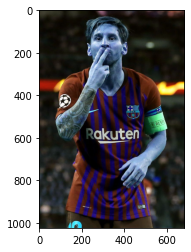

In [18]:
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 683)

In [20]:
gray

array([[52, 51, 51, ..., 60, 60, 60],
       [53, 52, 52, ..., 55, 55, 55],
       [53, 53, 52, ..., 49, 49, 49],
       ...,
       [28, 29, 31, ..., 35, 35, 35],
       [28, 30, 31, ..., 34, 34, 34],
       [28, 30, 31, ..., 36, 36, 36]], dtype=uint8)

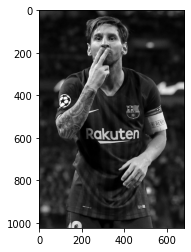

In [21]:
plt.imshow(gray, cmap='gray')

In [22]:
face_cascade = cv2.CascadeClassifier('C:haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces  # x,y,width,height

array([[222,  61, 179, 179]])

In [23]:
faces.shape

(1, 4)

In [24]:
(x,y,w,h) = faces[0]
x,y,w,h

(222, 61, 179, 179)

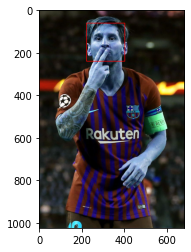

In [25]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

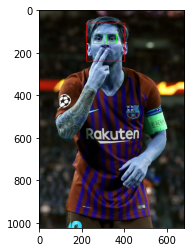

In [26]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

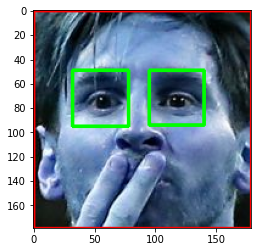

In [27]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [50]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color

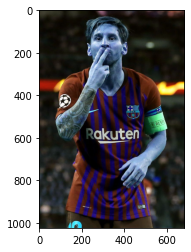

In [38]:
original_image = cv2.imread('C:test_image/02453493f852c0efe8ff951dea5845c4.jpg')
plt.imshow(original_image)

Eyes Detected


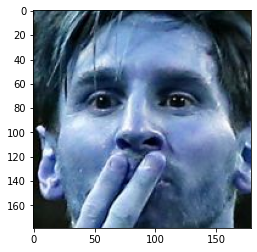

In [39]:
cropped_image = get_cropped_image_if_2_eyes('C:test_image/02453493f852c0efe8ff951dea5845c4.jpg')
plt.imshow(cropped_image)

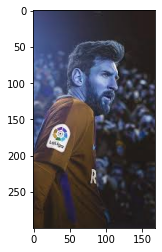

In [40]:
org_image_obstructed = cv2.imread('C:test_image/images.jfif')
plt.imshow(org_image_obstructed)

In [41]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:test_image/images.jfif')
cropped_image_no_2_eyes

In [44]:
path_to_data = "C:../images_dataset/"
path_to_cr_data = "./dataset/cropped/"

In [45]:
# used to append the all folders path
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [46]:
img_dirs

['C:../images_dataset/lionel_messi',
 'C:../images_dataset/maria_sharapova',
 'C:../images_dataset/roger_federer',
 'C:../images_dataset/serena_williams',
 'C:../images_dataset/virat_kohli']

In [48]:
# used to create the directory/folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [51]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] # -1 for last element 
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


##### Manually clear cropped image that does not contain a celebrity face

In [52]:
cropped_image_dirs

['./dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/roger_federer',
 './dataset/cropped/serena_williams',
 './dataset/cropped/virat_kohli']

In [53]:
 celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

#### After all, as we have a small dataset, we have to manually clean the data by identifying the faces, whether this face belongs to the same person or not.